In [194]:
# This notebook generates the graphs and information used in the results folder

In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file with bird species and their median ratios
df = pd.read_csv('bird_beak_to_body_medians.csv')
df_mean = pd.read_csv('bird_beak_to_body_ratios.csv')

sns.set(style="whitegrid")




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data for the actual beak-to-body ratios calculated from values taken from AVONET
avonet_df = pd.read_csv("avonet_data.csv")
# avonet_ratio_column = avonet_df["Beak to body ratio"]
actual_ratios = avonet_df["Beak to body ratio"]

# Mapping from directory names to cleaned species names
species_name_map = {
    "001.Black_footed_Albatross": "Black footed albatross",
    "002.Laysan_Albatross": "Laysan Albatross",
    "003.Sooty_Albatross": "Sooty Albatross",
    "004.Groove_billed_Ani": "Grooved-bill ani",
    "008.Rhinoceros_Auklet": "Rhinoceros Auklet",
    "005.Crested_Auklet": "Crested Auklet",
    "006.Least_Auklet": "Least Auklet",
    "007.Parakeet_Auklet": "Parakeet Auklet",
    "012.Yellow_headed_Blackbird": "Yellow-headed blackbird",
    "014.Indigo_Bunting": "Indigo Bunting",
    "013.Bobolink": "Bobolink",
    "009.Brewer_Blackbird": "Brewer Blackbird",
    "019.Gray_Catbird": "Gray Catbird"
}


# Selected species list 
selected_species = [
    "Black footed albatross", "Laysan Albatross", "Sooty Albatross", "Grooved-bill ani", 
    "Rhinoceros Auklet", "Crested Auklet", "Least Auklet", "Parakeet Auklet", 
    "Yellow-headed blackbird", "Indigo Bunting", "Bobolink", "Brewer Blackbird", 
    "Gray Catbird"
]

# Filter bird species
df_filtered = df[df['bird_species'].isin(species_name_map.keys())]
df_filtered['bird_species_cleaned'] = df_filtered['bird_species'].map(species_name_map)
df_filtered['actual_beak_to_body_ratio'] = df_filtered['bird_species_cleaned'].map(actual_ratios)

sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
df_melted = df_filtered.melt(id_vars=['bird_species_cleaned'], value_vars=['median_beak_to_body_ratio', 'actual_beak_to_body_ratio'], 
                             var_name='Ratio Type', value_name='Ratio')
# Plot estimated beak to body (based on median) ratio against actual ratio
sns.barplot(x='bird_species_cleaned', y='Ratio', hue='Ratio Type', data=df_melted, palette='Set2')
plt.title('Comparison of Calculated (median) vs Actual Beak-to-Body Ratios for Selected Bird Species')
plt.xlabel('Bird Species')
plt.ylabel('Beak-to-Body Ratio')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Filter bird species based on the mean
df_mean_filtered = df_mean[df_mean['bird_species'].isin(species_name_map.keys())]
df_mean_filtered['bird_species_cleaned'] = df_mean_filtered['bird_species'].map(species_name_map)
df_mean_filtered['actual_beak_to_body_ratio'] = df_mean_filtered['bird_species_cleaned'].map(actual_ratios)

plt.figure(figsize=(14, 8))
# Plot estimated beak to body (based on mean) ratio against actual ratio
df_mean_melted = df_mean_filtered.melt(id_vars=['bird_species_cleaned'], value_vars=['mean_beak_to_body_ratio', 'actual_beak_to_body_ratio'], 
                             var_name='Ratio Type', value_name='Ratio')
sns.barplot(x='bird_species_cleaned', y='Ratio', hue='Ratio Type', data=df_mean_melted, palette='Set2')
plt.title('Comparison of Calculated (mean) vs Actual Beak-to-Body Ratios for Selected Bird Species')
plt.xlabel('Bird Species')
plt.ylabel('Beak-to-Body Ratio')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



C:\Users\elija\AppData\Local\Temp\ipykernel_41620\1881723795.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['bird_species_cleaned'] = df_filtered['bird_species'].map(species_name_map)


TypeError: 'list' object is not callable

In [ ]:
# from scipy import stats
# t_stat, p_value = stats.ttest_rel(df_mean_filtered['mean_beak_to_body_ratio'], df_mean_filtered['actual_beak_to_body_ratio'])

# print(f"T-statistic: {t_stat:.4f}")
# print(f"P-value: {p_value:.4f}")
# if p_value < 0.05:
#     print("The differences between calculated and actual mean ratios are statistically significant.")
# else:
#     print("The differences between calculated and actual mean ratios are not statistically significant.")


In [ ]:
import pandas as pd

# Retrieve mean and median beak to body length ratios
df_mean = pd.read_csv('bird_beak_to_body_ratios.csv')
df_median = pd.read_csv('bird_beak_to_body_medians.csv')

# Merge the mean and median dataframes
df = pd.merge(df_mean, df_median, on='bird_species', suffixes=('_mean', '_median'))

df_filtered = df[df['bird_species'].isin(species_name_map.keys())]
df_filtered['bird_species_cleaned'] = df_filtered['bird_species'].map(species_name_map)
df_filtered['actual_beak_to_body_ratio'] = df_filtered['bird_species_cleaned'].map(actual_ratios)

# Calculate the estimated beak length (Estimtaed beak length (mm) = body length (mm) * estimated beak to body ratio)
df_filtered['body_length'] = df_filtered['bird_species_cleaned'].map(body_lengths)
df_filtered['estimated_beak_to_body_ratio_median'] = df_filtered['median_beak_to_body_ratio']
df_filtered['estimated_beak_to_body_ratio_mean'] = df_filtered['mean_beak_to_body_ratio']
df_filtered['estimated_beak_length_median'] = df_filtered['body_length'] * df_filtered['estimated_beak_to_body_ratio_median']
df_filtered['estimated_beak_length_mean'] = df_filtered['body_length'] * df_filtered['estimated_beak_to_body_ratio_mean']
df_filtered['difference_median'] = abs(df_filtered['actual_beak_to_body_ratio'] - df_filtered['estimated_beak_to_body_ratio_median'])
df_filtered['difference_mean'] = abs(df_filtered['actual_beak_to_body_ratio'] - df_filtered['estimated_beak_to_body_ratio_mean'])


print(df_filtered[['bird_species_cleaned', 'actual_beak_to_body_ratio', 
                   'estimated_beak_to_body_ratio_median', 'estimated_beak_length_median', 'difference_median', 
                   'estimated_beak_to_body_ratio_mean', 'estimated_beak_length_mean', 'difference_mean']])



       bird_species_cleaned  actual_beak_to_body_ratio  \
0    Black footed albatross                        NaN   
1          Laysan Albatross                        NaN   
2           Sooty Albatross                        NaN   
3          Grooved-bill ani                        NaN   
4            Crested Auklet                        NaN   
5              Least Auklet                        NaN   
6           Parakeet Auklet                        NaN   
7         Rhinoceros Auklet                        NaN   
8          Brewer Blackbird                        NaN   
11  Yellow-headed blackbird                        NaN   
12                 Bobolink                        NaN   
13           Indigo Bunting                        NaN   
18             Gray Catbird                        NaN   

    estimated_beak_to_body_ratio_median  estimated_beak_length_median  \
0                               0.04870                     37.109400   
1                               0.16120  

C:\Users\elija\AppData\Local\Temp\ipykernel_41620\2567137363.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['bird_species_cleaned'] = df_filtered['bird_species'].map(species_name_map)
C:\Users\elija\AppData\Local\Temp\ipykernel_41620\2567137363.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['actual_beak_to_body_ratio'] = df_filtered['bird_species_cleaned'].map(actual_ratios)
C:\Users\elija\AppData\Local\Temp\ipykernel_41620\2567137363.py:15: SettingWithCopyWarning: 
A val

In [ ]:
estimated_beak_length_median_column = df_filtered["estimated_beak_length_mean"]
estimated_beak_length_median_list = estimated_beak_length_median_column.tolist()

In [ ]:
avonet_df = pd.read_csv("avonet_data.csv")
avonet_body_length = avonet_df["Body length (mm)"]


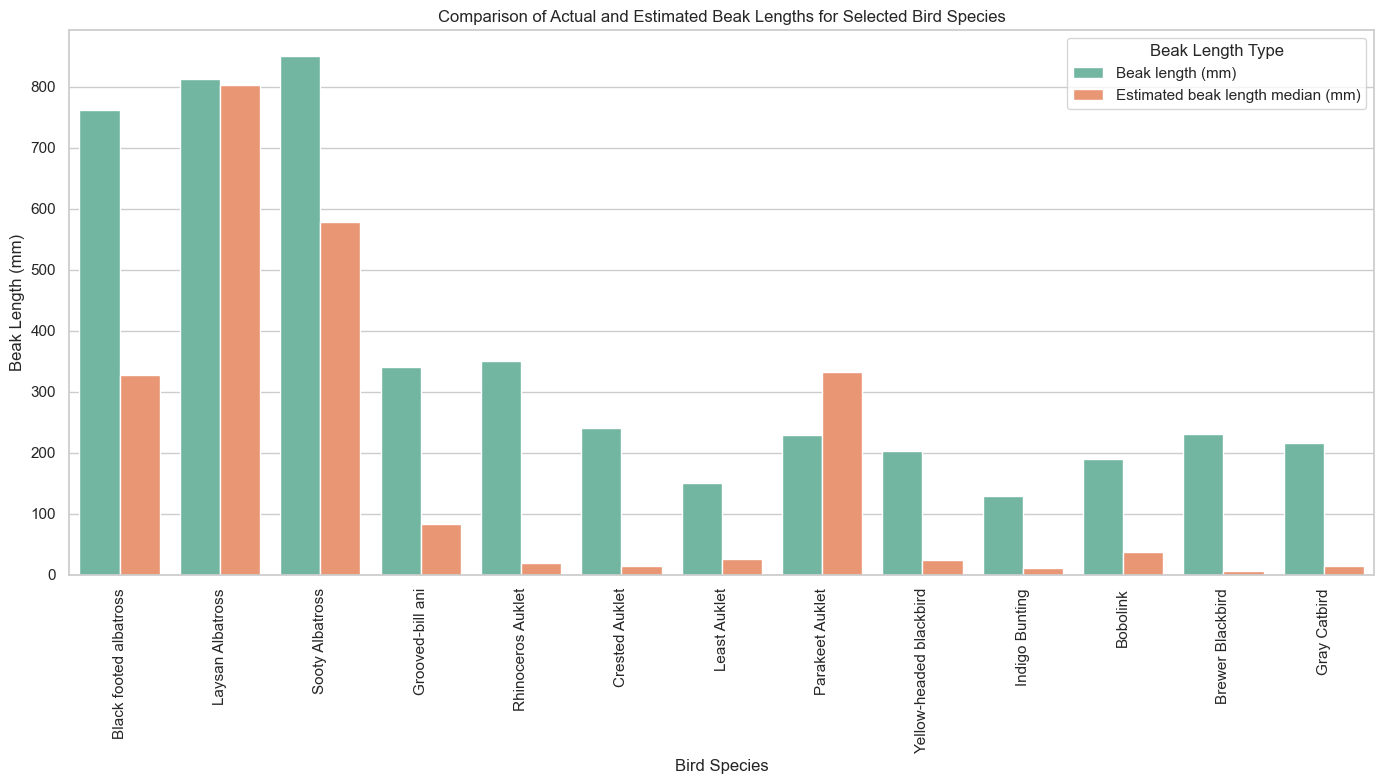

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Comparison of the actual vs. estimated beak lengths 
# Estimtaed beak length (mm) = body length (mm) * estimated beak to body ratio

data = {
    "Species": selected_species,
    "Beak length (mm)": avonet_body_length, # Taken from AVONET
    "Estimated beak length median (mm)": estimated_beak_length_median_list # Calculated estimated beak length taken from estimated_beak_length.csv 
}

df = pd.DataFrame(data)
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
df_melted = df.melt(id_vars=["Species"], value_vars=["Beak length (mm)", "Estimated beak length median (mm)"], 
                    var_name="Beak Length Type", value_name="Beak Length (mm)")

# Plot estimated beak length vs. actual beak length
sns.barplot(x="Species", y="Beak Length (mm)", hue="Beak Length Type", data=df_melted, palette="Set2")
plt.title("Comparison of Actual and Estimated Beak Lengths for Selected Bird Species")
plt.xlabel("Bird Species")
plt.ylabel("Beak Length (mm)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
